# Regridding NetCDF

In this example we will put both atmospheric gridded data and SHP data into the same custom grid of our choice. 

We first load useful libraries

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
from wrf import (getvar, interplevel, to_np, latlon_coords, CoordPair, xy_to_ll, ll_to_xy)
import geopandas as gp
from scipy.interpolate import griddata
import shapely
from shapely.geometry import Polygon
from shapely.geometry import Point
from pyresample.geometry import SwathDefinition
from pyresample.kd_tree import resample_nearest
import rioxarray
import matplotlib.mlab as ml
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors as colors
from matplotlib.patches import Circle,RegularPolygon
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cartopy.crs as ccrs
import cartopy
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.io import shapereader
import cartopy.io.img_tiles as cimgt
import warnings
warnings.filterwarnings("ignore")

/opt/anaconda3/envs/geo_env/lib/python3.10/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


We now set the number of columns displayed when inspecting a geopandas

In [2]:
pd.set_option('display.max_columns', 500)

## Regridding NetCDF

Let's start with an .nc file. 

In [3]:
hail_file = '../../DATA/wind.nc'
ds        = xr.open_dataset(hail_file)

The selected wind speed is the first bucket

In [49]:
lats=ds.FNOCY.data
lons=ds.FNOCXN79_64.data
var=ds.UWND[0].data

This is how the wind data looks like: 

In [50]:
Yi = np.linspace(np.min(lats.data),float(np.max(lats.data)),len(lats))
Xi = np.linspace(np.min(lons.data),float(np.max(lons.data)),len(lons))
X, Y = np.meshgrid(Xi,Yi)

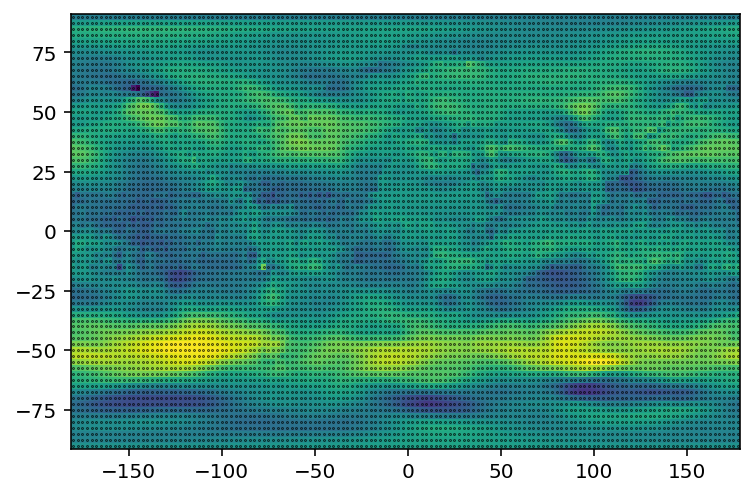

In [52]:
fig,ax = plt.subplots(dpi=144)
# ax.set_ylim(y_min,y_max)
# ax.set_xlim(x_min,x_max)
ax.pcolormesh(lons,lats,var);
ax.plot(X,Y,marker='o', color='k', linestyle='none',ms=.3);

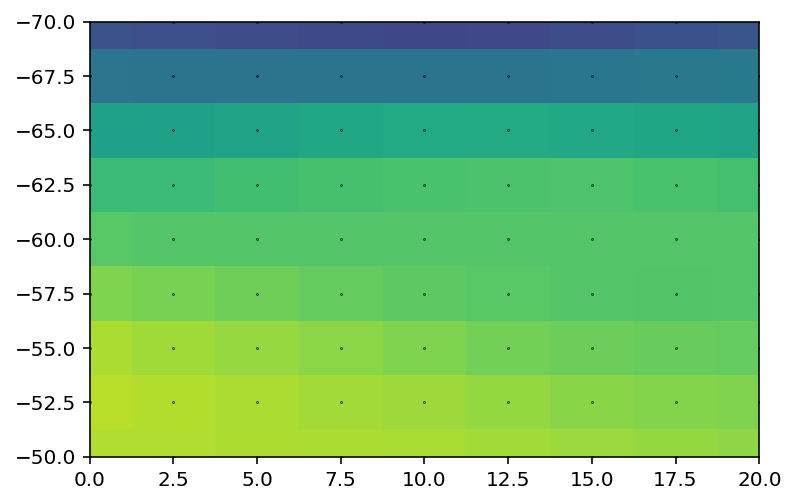

In [53]:
fig,ax = plt.subplots(dpi=144)
ax.set_ylim(-50,-70)
ax.set_xlim(0,20)
ax.pcolormesh(lons,lats,var);
ax.plot(X,Y,marker='o', color='k', linestyle='none',ms=.3);

We define the new regular mesh grid based on the existing lats and lons and adding a resolution six times (or any other) the existing one. 

In [48]:
Yin = np.linspace(np.min(lats.data),float(np.max(lats.data)),2*len(lats))
Xin = np.linspace(np.min(lons.data),float(np.max(lons.data)),2*len(lons))
Xn, Yn = np.meshgrid(Xin,Yin)

We can now overlap the new gridpoints onto the previous plot to stop the black new mesh grid. 

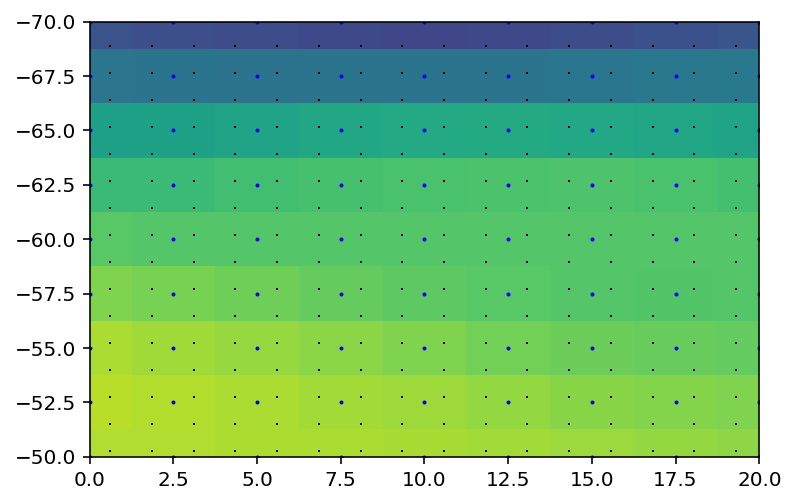

In [58]:
fig,ax = plt.subplots(dpi=144)
ax.set_ylim(-50,-70)
ax.set_xlim(0,20)
ax.pcolormesh(lons,lats,var);
ax.plot(X,Y,marker='o', color='b', linestyle='none',ms=1);
ax.plot(Xn,Yn, marker='+', color='black', linestyle='none',ms=1);

We now regrid the .nc onto the new grid defined by X and Y

In [65]:
nvals = griddata((X.ravel(),
                                   Y.ravel()),
                                   var.ravel(),
                                   (Xn,Yn),
                                   method='linear')

The outcome is the regridded data: 

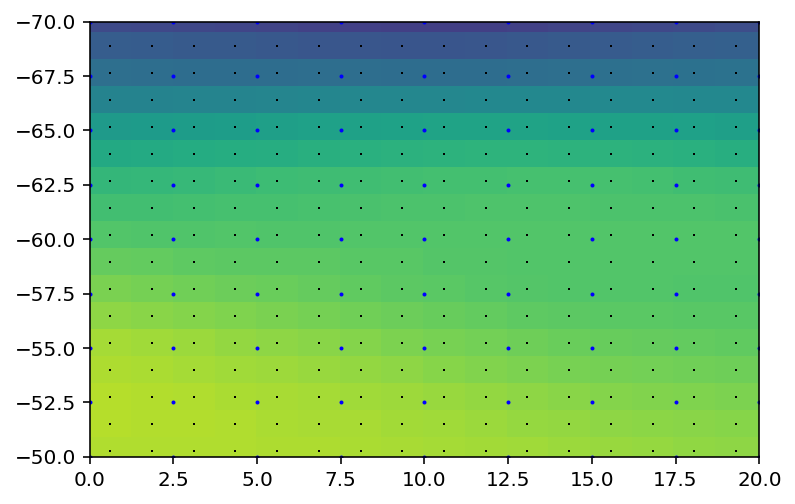

In [67]:
fig,ax = plt.subplots(dpi=144)
ax.set_ylim(-50,-70)
ax.set_xlim(0,20)
ax.pcolormesh(Xn,Yn,nvals);
ax.plot(X,Y,marker='o', color='b', linestyle='none',ms=1);
ax.plot(Xn,Yn, marker='+', color='black', linestyle='none',ms=1);